# Loading Data and libraries


In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [202]:
BS = pd.read_csv("D:\Leena_DataScience\day.csv")

In [203]:
BS.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [204]:
BS.shape

(730, 16)

In [205]:
BS.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [206]:
BS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [207]:
BS.loc[(BS['season'] == 1) , 'season'] = 'spring'
BS.loc[(BS['season'] == 2) , 'season'] = 'summer'
BS.loc[(BS['season'] == 3) , 'season'] = 'fall'
BS.loc[(BS['season'] == 4) , 'season'] = 'winter'

In [208]:
BS['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [209]:
BS['yr'].astype('category').value_counts()

1    365
0    365
Name: yr, dtype: int64

In [210]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
BS[['mnth']] = BS[['mnth']].apply(object_map)

In [211]:
BS['mnth'].astype('category').value_counts()

Oct     62
May     62
Mar     62
Jul     62
Jan     62
Dec     62
Aug     62
Sept    60
Nov     60
Jun     60
Apr     60
Feb     56
Name: mnth, dtype: int64

In [212]:
BS['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [213]:
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

BS[['weekday']] = BS[['weekday']].apply(str_map)

In [214]:
BS['weekday'].astype('category').value_counts()

Wed      105
Thurs    105
Tues     104
Sun      104
Sat      104
Mon      104
Fri      104
Name: weekday, dtype: int64

In [215]:
BS['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [216]:
BS.loc[(BS['weathersit'] == 1) , 'weathersit'] = 'A'
BS.loc[(BS['weathersit'] == 2) , 'weathersit'] = 'B'
BS.loc[(BS['weathersit'] == 3) , 'weathersit'] = 'C'
BS.loc[(BS['weathersit'] == 4) , 'weathersit'] = 'D'

In [217]:
BS['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [218]:
BS['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

# Data Visualisation

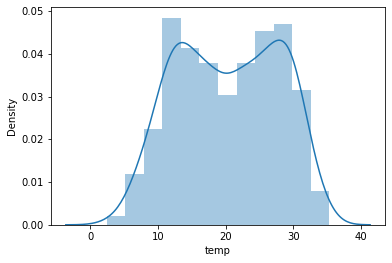

In [125]:
sns.distplot(BS['temp'])
plt.show()

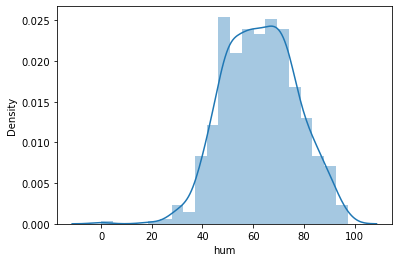

In [126]:
# humidity
sns.distplot(BS['hum'])
plt.show()

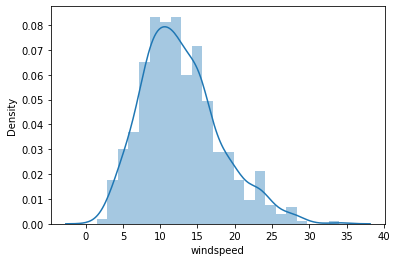

In [127]:
# wind speed
sns.distplot(BS['windspeed'])
plt.show()

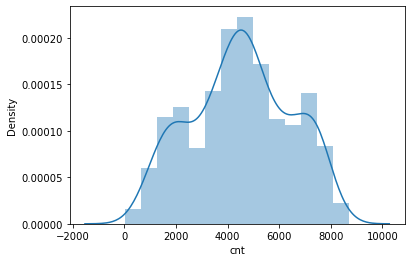

In [128]:
sns.distplot(BS['cnt'])
plt.show()

In [129]:
BS['dteday']=BS['dteday'].astype('datetime64')

In [130]:

BS_categorical=BS.select_dtypes(exclude=['float64','datetime64','int64'])
BS_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [131]:
BS_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,Tues,B
728,spring,Dec,Wed,A


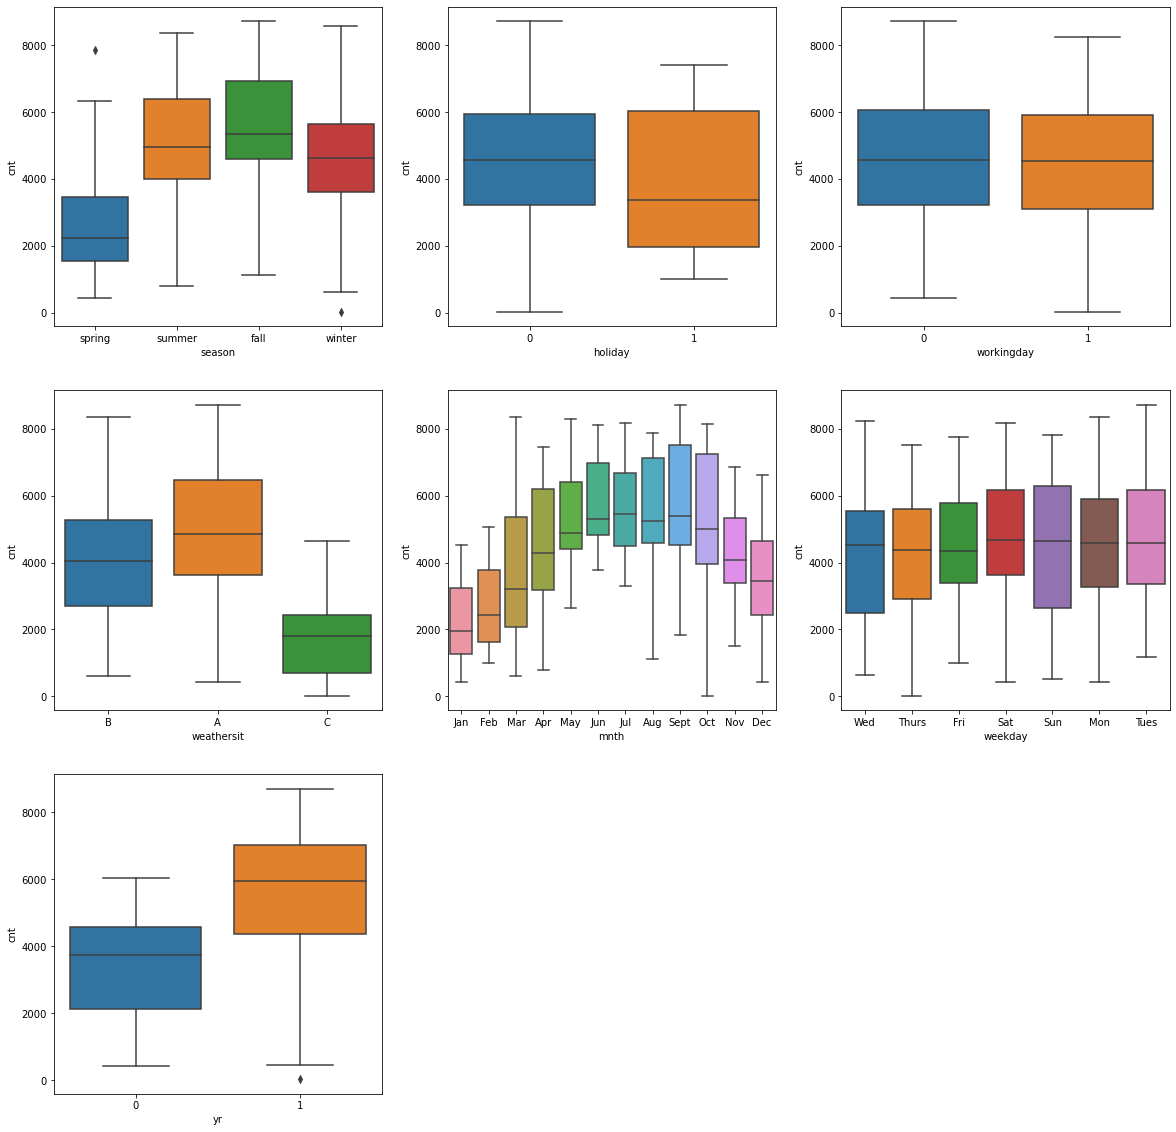

In [132]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS)
plt.show()



In [133]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    BS[var] = BS[var].astype("float")


In [134]:
BS_numeric = BS.select_dtypes(include=['float64'])
BS_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


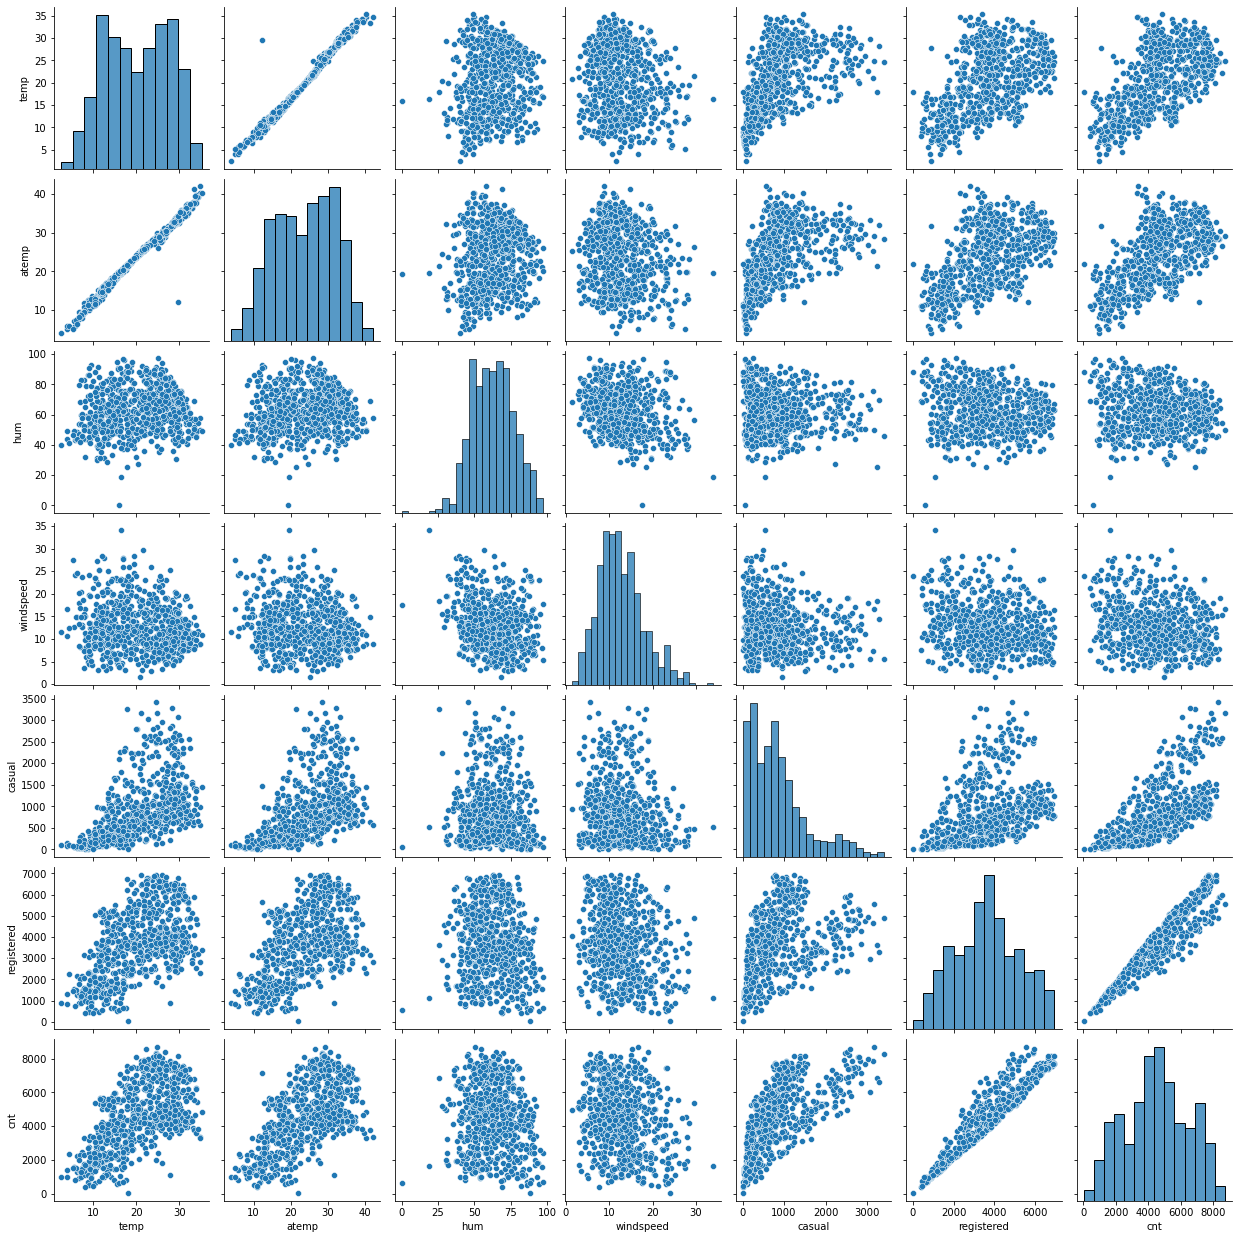

In [135]:
sns.pairplot(BS_numeric)
plt.show()

In [136]:
cor = BS_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


In [35]:
BS.drop('atemp',axis=1,inplace=True)    

In [137]:
BS_categorical=BS.select_dtypes(include=['object'])

# Data Preparation¶

In [138]:
# Convert into dummies
BS_dummies = pd.get_dummies(BS_day_categorical, drop_first=True)
BS_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [139]:
BS = BS.drop(list(BS_categorical.columns), axis=1)

In [140]:
BS= pd.concat([BS, BS_dummies], axis=1)

In [141]:
BS.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331.0,...,0,0,0,0,0,0,0,1,1,0
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131.0,...,0,0,0,0,0,1,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,...,0,0,0,1,0,0,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,...,0,0,0,0,1,0,0,0,0,0


In [142]:
BS=BS.drop(['instant','dteday'], axis = 1, inplace = False)
BS.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,1,0,0,0,0,0


In [143]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS, train_size=0.7, test_size=0.3, random_state=100)

In [144]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,23.04230,55.8333,12.208807,922.0,6612.0,7534.0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,968.0,6248.0,7216.0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,956.0,3110.0,4066.0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,1120.0,3100.0,4220.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,1017.0,5647.0,6664.0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,30.852500,35.35440,65.9583,8.666718,983.0,6278.0,7261.0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,139.0,1778.0,1917.0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,10.591653,12.46855,56.0833,16.292189,275.0,2464.0,2739.0,...,0,0,0,0,0,0,0,1,1,0


In [145]:
from sklearn.preprocessing import MinMaxScaler 

In [146]:
scaler = MinMaxScaler()

In [147]:
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [148]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,23.04230,0.575354,0.300794,0.280402,0.951776,0.864243,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,33.14480,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,20.67460,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,11.58500,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,18.87520,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,32.98605,0.605840,0.355596,0.309357,0.812446,0.764151,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,0.863973,35.35440,0.679690,0.187140,0.298994,0.903552,0.832835,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,12.28585,0.435939,0.111379,0.041756,0.253826,0.218017,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,0.248216,12.46855,0.577930,0.431816,0.083206,0.352873,0.312586,...,0,0,0,0,0,0,0,1,1,0


In [149]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,23.493909,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.086275,0.080392,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,8.090038,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.281045,0.272166,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,24.020400,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


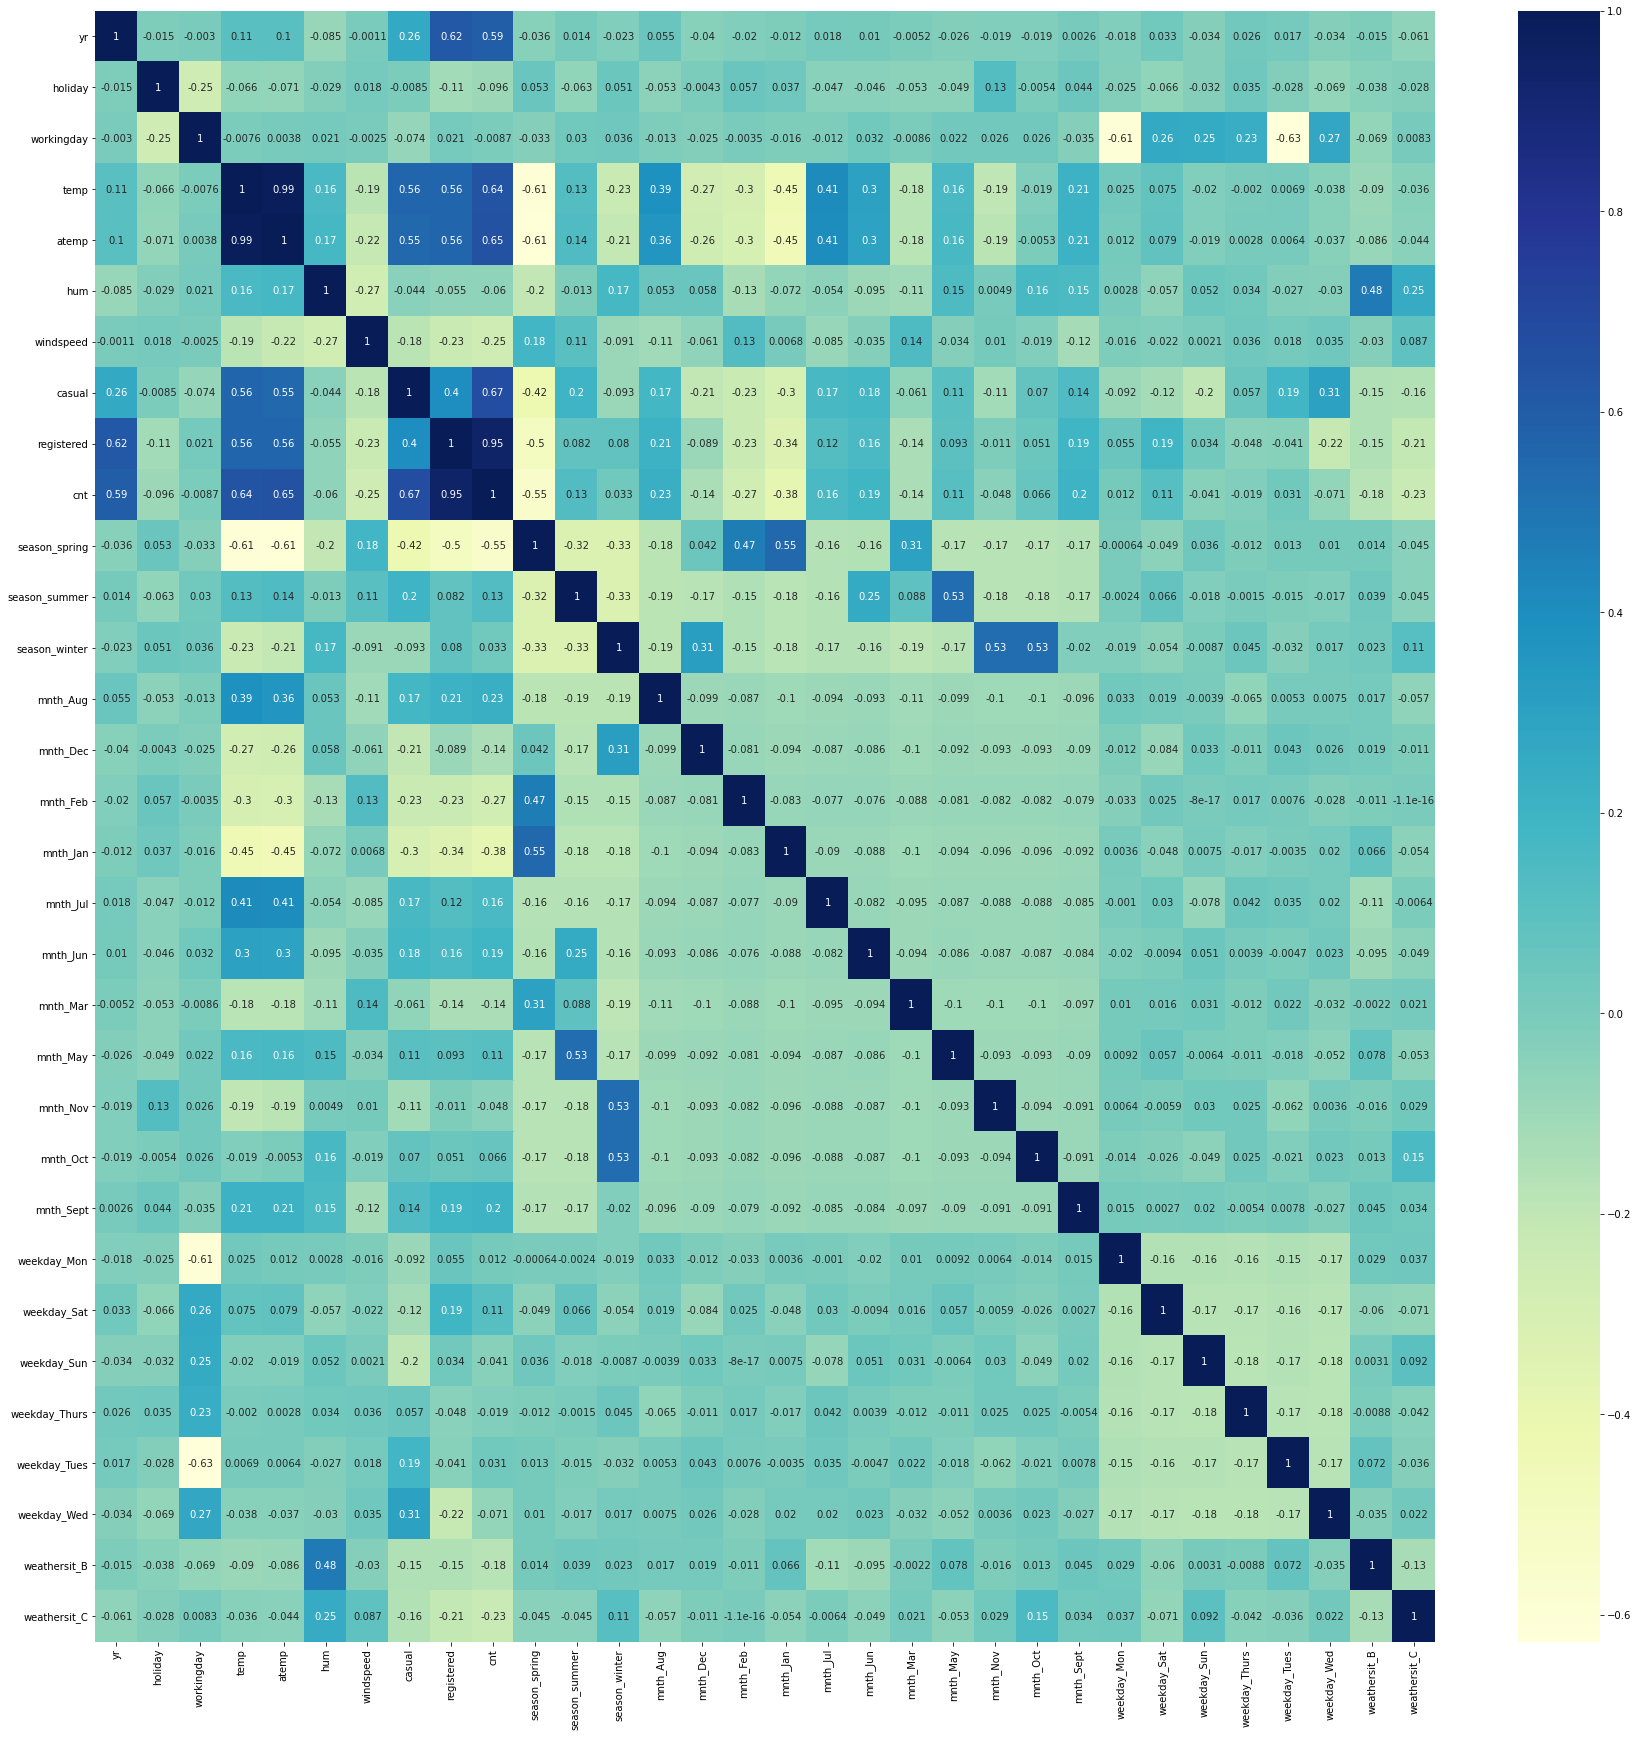

In [150]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

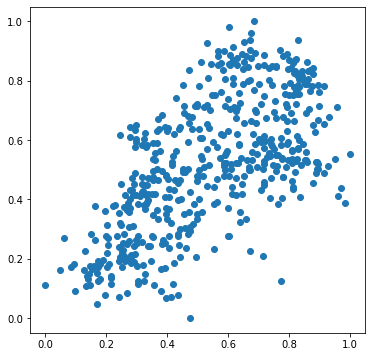

In [151]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [152]:
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [153]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,23.0423,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,11.5850,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [154]:
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [155]:
X_train.shape

(510, 29)

##### Building the first model with all the features

In [159]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.378700
yr               0.230933
holiday         -0.135245
workingday      -0.060878
temp             0.400268
atemp            0.001219
hum             -0.157757
windspeed       -0.181137
season_spring   -0.044097
season_summer    0.041756
season_winter    0.110482
mnth_Aug         0.023034
mnth_Dec        -0.045685
mnth_Feb        -0.037177
mnth_Jan        -0.063451
mnth_Jul        -0.033912
mnth_Jun         0.002144
mnth_Mar         0.000805
mnth_May         0.024765
mnth_Nov        -0.041530
mnth_Oct         0.005922
mnth_Sept        0.086720
weekday_Mon     -0.045062
weekday_Sat      0.015088
weekday_Sun      0.011247
weekday_Thurs   -0.015094
weekday_Tues    -0.039061
weekday_Wed     -0.013421
weathersit_B    -0.059311
weathersit_C    -0.250902
dtype: float64

In [160]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [161]:
lm.coef_
lm.intercept_

0.37870008317309917

In [162]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          4.09e-178
Time:                        22:15:05   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3787      0.085      4.440      0.000       0.211       0.546
yr                0.2309      0.008     28.359      0.000       0.215       0.247
holiday          -0.1352      0.065     -2.068      0.039      -0.264      -0.007
workingday       -0.0609      0.071     -0.856      0.392      -0.201       0.079
temp              0.4003      0.143      2.790      0.005       0.118       0.682
atemp             0.0012      0.004      0.333      0.739      -0.006       0.008
hum              -0.1578      0.039     -4.054      0.000      -0.234      -0.081
windspeed        -0.1811      0.027     -6.793      0.000      -0.234      -0.129
season_spring    -0.0441      0.030     -1.455      0.146      -0.104       0.015
season_summer     0.0418      0.027      1.575      0.116      -0.010       0.094
season_winter     0.1105      0.028      3.915      0.000       0.055       0.166
mnth_Aug          0.0230      0.034      0.671      0.503      -0.044       0.091
mnth_Dec         -0.0457      0.034     -1.347      0.178      -0.112       0.021
mnth_Feb         -0.0372      0.033     -1.117      0.265      -0.103       0.028
mnth_Jan         -0.0635      0.034     -1.873      0.062      -0.130       0.003
mnth_Jul         -0.0339      0.036     -0.953      0.341      -0.104       0.036
mnth_Jun          0.0021      0.026      0.084      0.933      -0.048       0.052
mnth_Mar          0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May          0.0248      0.021      1.161      0.246      -0.017       0.067
mnth_Nov         -0.0415      0.037     -1.131      0.259      -0.114       0.031
mnth_Oct          0.0059      0.036      0.164      0.870      -0.065       0.077
mnth_Sept         0.0867      0.032      2.680      0.008       0.023       0.150
weekday_Mon      -0.0451      0.071     -0.636      0.525      -0.184       0.094
weekday_Sat       0.0151      0.015      0.978      0.328      -0.015       0.045
weekday_Sun       0.0112      0.015      0.736      0.462      -0.019       0.041
weekday_Thurs    -0.0151      0.015     -1.006      0.315      -0.045       0.014
weekday_Tues     -0.0391      0.071     -0.552      0.581      -0.178       0.100
weekday_Wed      -0.0134      0.015     -0.888      0.375      -0.043       0.016
weathersit_B     -0.0593      0.011     -5.627      0.000      -0.080      -0.039
weathersit_C     -0.2509      0.027     -9.402      0.000      -0.303      -0.198
==============================================================================
Omnibus:                       79.473   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.099
Skew:                          -0.773   Prob(JB):                     1.45e-46
Kurtosis:                       5.747   Cond. No.            

In [163]:
# Import RFE
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe1 = RFE(lm, 15)
rfe1.fit(X_train, y_train)
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True False  True False  True  True  True  True  True False  True
 False  True  True False False False  True False  True False False False
 False False False  True  True]
[ 1  1  3  1 14  1  1  1  1  1  9  1  2  1  1 13 15  6  1 12  1  4 10 11
  7  5  8  1  1]


#### Model Building and Evaluation 

In [164]:
import statsmodels.api as sm  
col1 = X_train.columns[rfe1.support_]
X_train_rfe1 = X_train[col1]
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [165]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          3.34e-189
Time:                        22:15:10   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

It has gone from **84.5%** to **84.4%**. This is indeed a good indication to proceed with these selected features.

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
a=X_train_rfe1.drop('const',axis=1)

In [168]:
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_B,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [169]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe2 = RFE(lm, 7)
rfe2.fit(X_train, y_train)
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True False False  True False  True  True  True False False False False
 False False  True False False False False False False False False False
 False False False False  True]
[ 1  2 11  1 22  1  1  1  6  3 17  9 10  7  1 21 23 14  8 20  4 12 18 19
 15 13 16  5  1]


In [170]:
import statsmodels.api as sm  

col1 = X_train.columns[rfe2.support_]
X_train_rfe2 = X_train[col1]
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [171]:
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.34e-178
Time:                        22:15:20   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348      0.000       0.369       0.486
yr                0.2301      0.009     26.240      0.000       0.213       0.247
temp              0.4480      0.027     16.720      0.000       0.395       0.501
hum              -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed        -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_Jul         -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_C     -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
b=X_train_rfe2.drop('const',axis=1)

In [173]:
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_C,1.11


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

In [174]:
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [175]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          1.37e-168
Time:                        22:15:25   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.020     12.986      0.000       0.220       0.299
yr                0.2360      0.009     25.713      0.000       0.218       0.254
temp              0.4279      0.028     15.277      0.000       0.373       0.483
windspeed        -0.1524      0.028     -5.536      0.000      -0.206      -0.098
season_spring    -0.1413      0.014    -10.427      0.000      -0.168      -0.115
mnth_Jul         -0.0715      0.019     -3.769      0.000      -0.109      -0.034
weathersit_C     -0.2413      0.027     -8.873      0.000      -0.295      -0.188
==============================================================================
Omnibus:                       54.941   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.150
Skew:                          -0.657   Prob(JB):                     1.09e-22
Kurtosis:                       4.742   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
c=X_train_rfe2.drop('const',axis=1)

In [178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_C,1.04


The Adj R value has dropped from 84.5% just 79.1% . So let's proceed with this model.

In [179]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

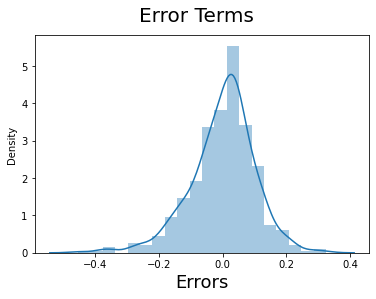

In [180]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)    
plt.xlabel('Errors', fontsize = 18)                         

The error terms are fairly normally distributed and we can surely live with this.

#### Making Predictions

In [181]:
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [182]:
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [183]:
df_test[var] = scaler.transform(df_test[var])

In [184]:
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [185]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,22.85230,0.837699,0.334206,0,0,1,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.817246,32.19710,0.314298,0.537414,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [186]:
col2=c.columns
col2

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul', 'weathersit_C'], dtype='object')

In [187]:
X_test_rfe2 = X_test[col2]

In [188]:
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_spring  219 non-null    uint8  
 5   mnth_Jul       219 non-null    uint8  
 6   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 9.2 KB


In [189]:
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

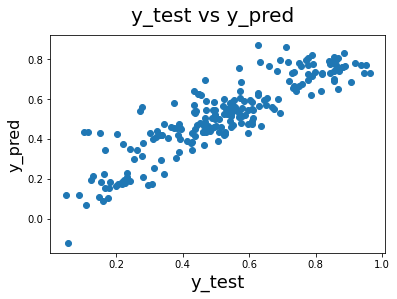

In [190]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [191]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228019

Thus, for the model with 6 variables, the r-squared on training and test data is about 79.3% and 78.02% respectively. The adjusted r-squared on the train set is about is about 79.1%.